# Evaluate XGBoost Multi Polos Result

Evaluation of each model of training polo

In [1]:
import sys
sys.path.append('../../../src')
from utils import  generate_dataset_split, load_combinations
import pickle
from models.xgboost_multiclass_model import XGBoostMulticlassModel
from evaluator import MultiClassEvaluator
import pandas as pd

c:\Users\caior\OneDrive\Documentos\GitHub\xai-nui-classification\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
addresses = []
for i in range(10):
    addresses.append(f'../../../data/models/multiclass/split3_2/Juazeiro do Norte/xgb_{i}.sav')

In [3]:
combinations = load_combinations('models/multiclass/split3_2/Juazeiro do Norte/combination.pkl')

## Comb 0

In [4]:
model_comb0 = XGBoostMulticlassModel()
model_comb0.load_model(addresses[3])

c:\Users\caior\OneDrive\Documentos\GitHub\xai-nui-classification\venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:17:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'learning_rate': array([0.001, 0.006, 0.011, 0.016, 0.021, 0.026, 0.031, 0.036, 0.041,
       0.046, 0.051, 0.056, 0.061, 0.066, 0.071, 0.076, 0.081, 0.086,
       0.091, 0.096]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7], dtype=int64),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140], dtype=int64),
                                        'num_class': [3],
                                        'objective': ['multi:softmax'],
                                        'subsample': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=42, scoring='f1_weighted')

In [5]:
X_test, y_test  = generate_dataset_split(['Juazeiro do Norte'], 'multiclass')

eval_comb0 = MultiClassEvaluator(model_comb0)
eval_comb0.evaluate(X_test, y_test)

F1 Score: 0.3186506979610428
ROC AUC Score: 0.5476409304822628
ROC AUC Score Class 1: 0.4999865443095885
ROC AUC Score Class 2: 0.5


## Comb 1

In [10]:
model_comb1 = XGBoostModel()
model_comb1.load_model(addresses[1])

In [11]:
X1_val, y1_val = generate_dataset_split(combinations[1][1])
best_threshold = model_comb1.find_best_threshold(X1_val, y1_val)

[I 2023-09-10 22:39:14,520] A new study created in memory with name: no-name-eaef4333-df47-429b-b64b-05dcca54dc47
[I 2023-09-10 22:39:14,908] Trial 0 finished with value: 0.5665415358843259 and parameters: {'threshold': 0.5185373890190828}. Best is trial 0 with value: 0.5665415358843259.
[I 2023-09-10 22:39:15,009] Trial 1 finished with value: 0.6666448464236765 and parameters: {'threshold': 0.7153544177774208}. Best is trial 1 with value: 0.6666448464236765.
[I 2023-09-10 22:39:15,109] Trial 2 finished with value: 0.5505125142265613 and parameters: {'threshold': 0.5095466070431143}. Best is trial 1 with value: 0.6666448464236765.
[I 2023-09-10 22:39:15,218] Trial 3 finished with value: 0.6666448464236765 and parameters: {'threshold': 0.6697668439954672}. Best is trial 1 with value: 0.6666448464236765.
[I 2023-09-10 22:39:15,322] Trial 4 finished with value: 0.08766623487397143 and parameters: {'threshold': 0.2299696216625068}. Best is trial 1 with value: 0.6666448464236765.
[I 2023-09

In [12]:
print(best_threshold)

0.5900351919364246


In [13]:
X_test, y_test  = generate_dataset_split(['Porto Alegre'])

eval_comb1 = XGBoostEvaluator(model_comb1)
eval_comb1.evaluate(X_test, y_test)

Accuracy: 0.7955895808886528
F1 Score: 0.30613493180011014
ROC AUC Score: 0.7955895808886528
Recall: 0.33701434246852063
Precision: 0.28043928951644537


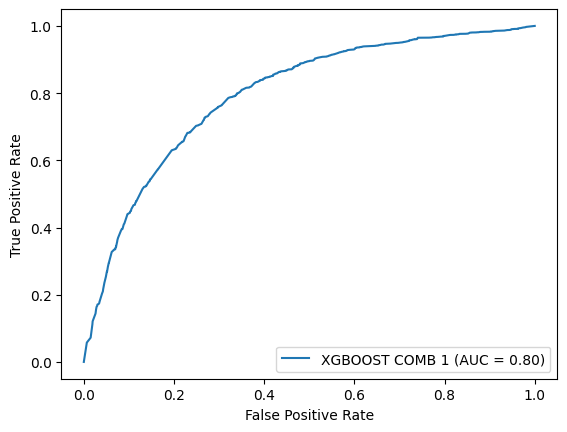

In [14]:
eval_comb1.plot_roc_curve(y_test, "XGBOOST COMB 1")

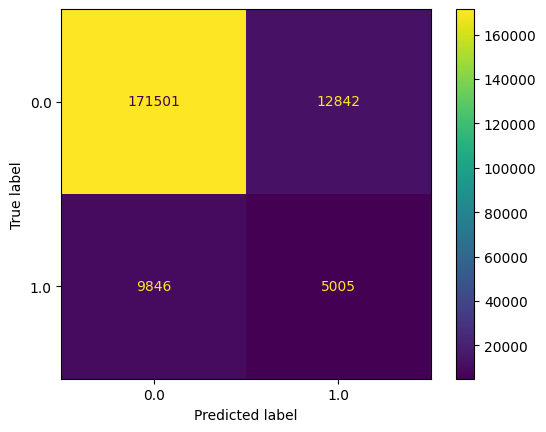

In [15]:
eval_comb1.plot_confusion_matrix(y_test)

## Comb 2

In [16]:
model_comb2 = XGBoostModel()
model_comb2.load_model(addresses[2])

In [17]:
X2_val, y2_val = generate_dataset_split(combinations[2][1])
best_threshold = model_comb2.find_best_threshold(X2_val, y2_val)

[I 2023-09-10 22:39:22,521] A new study created in memory with name: no-name-516e6ef5-cbe1-41ce-86de-3202b1e76326
[I 2023-09-10 22:39:22,812] Trial 0 finished with value: 0.6852688785625054 and parameters: {'threshold': 0.7395813024093703}. Best is trial 0 with value: 0.6852688785625054.
[I 2023-09-10 22:39:22,894] Trial 1 finished with value: 0.4150467460235611 and parameters: {'threshold': 0.5144666561710886}. Best is trial 0 with value: 0.6852688785625054.
[I 2023-09-10 22:39:23,053] Trial 2 finished with value: 0.7183406067820279 and parameters: {'threshold': 0.7663138633293549}. Best is trial 2 with value: 0.7183406067820279.
[I 2023-09-10 22:39:23,173] Trial 3 finished with value: 0.520675489656169 and parameters: {'threshold': 0.6070045622016932}. Best is trial 2 with value: 0.7183406067820279.
[I 2023-09-10 22:39:23,266] Trial 4 finished with value: 0.16695889127337296 and parameters: {'threshold': 0.21142412415554634}. Best is trial 2 with value: 0.7183406067820279.
[I 2023-09

In [18]:
print(best_threshold)

0.7987226077975583


In [19]:
X_test, y_test  = generate_dataset_split(['Porto Alegre'])

eval_comb2 = XGBoostEvaluator(model_comb2)
eval_comb2.evaluate(X_test, y_test)

Accuracy: 0.8212495143233419
F1 Score: 0.38875060795925953
ROC AUC Score: 0.8212495143233419
Recall: 0.45747761093529055
Precision: 0.33797632076410306


## Comb 2

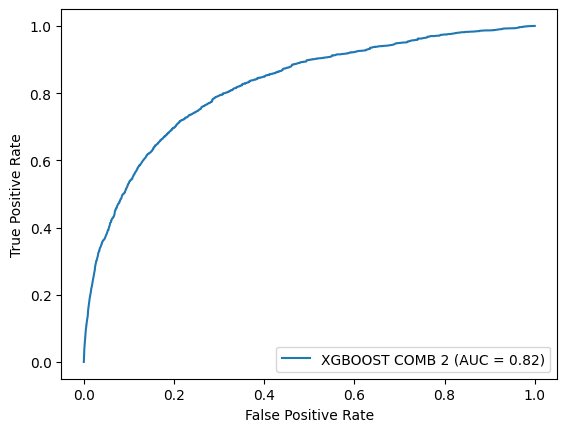

In [20]:
eval_comb2.plot_roc_curve(y_test, "XGBOOST COMB 2")

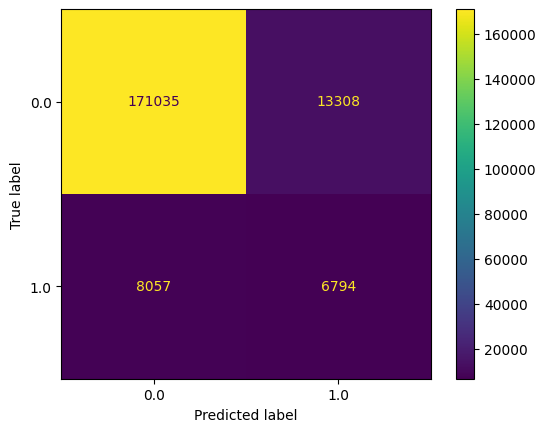

In [21]:
eval_comb2.plot_confusion_matrix(y_test)

## Comb 3

In [22]:
model_comb3 = XGBoostModel()
model_comb3.load_model(addresses[3])

In [23]:
X3_val, y3_val = generate_dataset_split(combinations[3][1])
best_threshold = model_comb3.find_best_threshold(X3_val, y3_val)

[I 2023-09-10 22:39:30,500] A new study created in memory with name: no-name-0a2ef0e6-8c3c-4537-9ffa-d80744363c21
[I 2023-09-10 22:39:31,005] Trial 0 finished with value: 0.044587181316366395 and parameters: {'threshold': 0.0523705509535481}. Best is trial 0 with value: 0.044587181316366395.
[I 2023-09-10 22:39:31,119] Trial 1 finished with value: 0.7657269254593027 and parameters: {'threshold': 0.7313801097328306}. Best is trial 1 with value: 0.7657269254593027.
[I 2023-09-10 22:39:31,226] Trial 2 finished with value: 0.5529841976085071 and parameters: {'threshold': 0.5517324688045177}. Best is trial 1 with value: 0.7657269254593027.
[I 2023-09-10 22:39:31,345] Trial 3 finished with value: 0.7463301183903917 and parameters: {'threshold': 0.6403759428206877}. Best is trial 1 with value: 0.7657269254593027.
[I 2023-09-10 22:39:31,458] Trial 4 finished with value: 0.044587181316366395 and parameters: {'threshold': 0.2220826581689236}. Best is trial 1 with value: 0.7657269254593027.
[I 20

In [24]:
print(best_threshold)

0.6704462183385808


In [25]:
X_test, y_test  = generate_dataset_split(['Porto Alegre'])

eval_comb3 = XGBoostEvaluator(model_comb3)
eval_comb3.evaluate(X_test, y_test)

Accuracy: 0.7882545961735609
F1 Score: 0.19201570004648041
ROC AUC Score: 0.7882545961735609
Recall: 0.12517675577402196
Precision: 0.4120124113475177


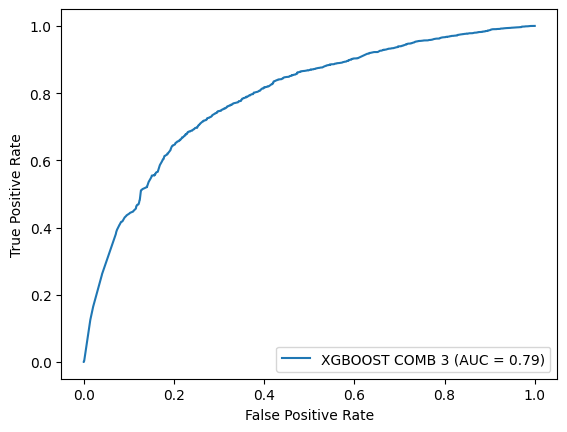

In [26]:
eval_comb3.plot_roc_curve(y_test, "XGBOOST COMB 3")

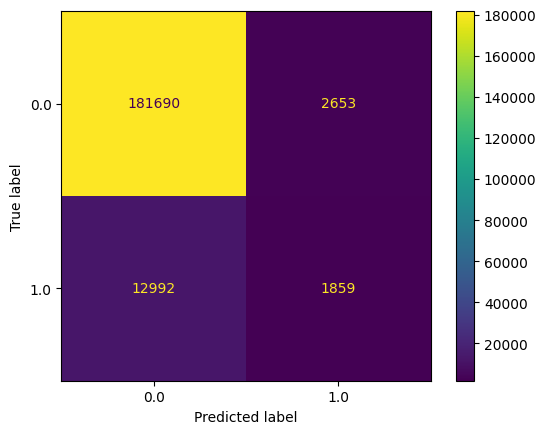

In [27]:
eval_comb3.plot_confusion_matrix(y_test)

## Comb 4

In [28]:
model_comb4 = XGBoostModel()
model_comb4.load_model(addresses[4])

In [29]:
X4_val, y4_val = generate_dataset_split(combinations[4][1])
best_threshold = model_comb4.find_best_threshold(X4_val, y4_val)

[I 2023-09-10 22:39:39,487] A new study created in memory with name: no-name-d76d2f8b-6aa1-4a2c-b14e-966d0ce1e503
[I 2023-09-10 22:39:39,810] Trial 0 finished with value: 0.5533939490920389 and parameters: {'threshold': 0.3686457638828571}. Best is trial 0 with value: 0.5533939490920389.
[I 2023-09-10 22:39:39,887] Trial 1 finished with value: 0.5514202717451331 and parameters: {'threshold': 0.36624906357433773}. Best is trial 0 with value: 0.5533939490920389.
[I 2023-09-10 22:39:39,956] Trial 2 finished with value: 0.44040853456167434 and parameters: {'threshold': 0.23948024810086832}. Best is trial 0 with value: 0.5533939490920389.
[I 2023-09-10 22:39:40,065] Trial 3 finished with value: 0.6005773049874832 and parameters: {'threshold': 0.4463118381810894}. Best is trial 3 with value: 0.6005773049874832.
[I 2023-09-10 22:39:40,133] Trial 4 finished with value: 0.774423204839013 and parameters: {'threshold': 0.7463804036038186}. Best is trial 4 with value: 0.774423204839013.
[I 2023-09

In [30]:
print(best_threshold)

0.7990734327379965


In [31]:
X_test, y_test  = generate_dataset_split(['Porto Alegre'])

eval_comb4 = XGBoostEvaluator(model_comb4)
eval_comb4.evaluate(X_test, y_test)

Accuracy: 0.8354299648793637
F1 Score: 0.4139645776566757
ROC AUC Score: 0.8354299648793637
Recall: 0.4091980338024375
Precision: 0.4188434764628851


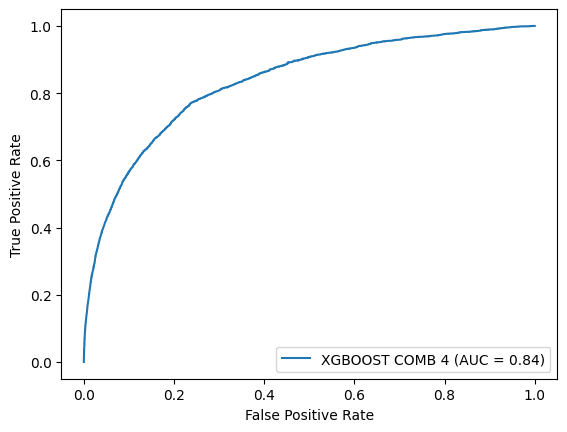

In [32]:
eval_comb4.plot_roc_curve(y_test, "XGBOOST COMB 4")

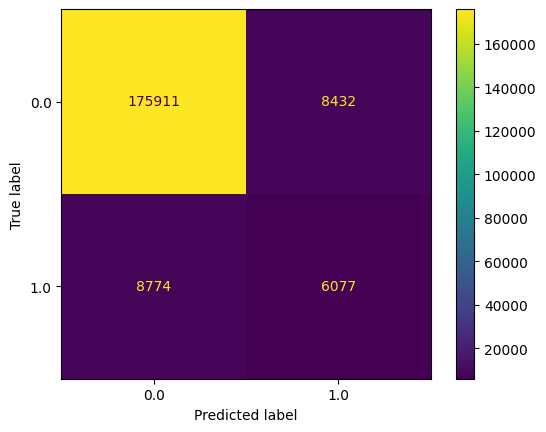

In [33]:
eval_comb4.plot_confusion_matrix(y_test)

## Comb 5

In [34]:
model_comb5 = XGBoostModel()
model_comb5.load_model(addresses[5])

In [35]:
X5_val, y5_val = generate_dataset_split(combinations[5][1])
best_threshold = model_comb5.find_best_threshold(X5_val, y5_val)

[I 2023-09-10 22:39:47,938] A new study created in memory with name: no-name-f80438ba-570c-4ba5-acc6-7405d05153f4
[I 2023-09-10 22:39:48,465] Trial 0 finished with value: 0.36675900107226306 and parameters: {'threshold': 0.36849283350993817}. Best is trial 0 with value: 0.36675900107226306.
[I 2023-09-10 22:39:48,626] Trial 1 finished with value: 0.6083039637639173 and parameters: {'threshold': 0.623799748003888}. Best is trial 1 with value: 0.6083039637639173.
[I 2023-09-10 22:39:48,786] Trial 2 finished with value: 0.4465771773315295 and parameters: {'threshold': 0.45963508236616835}. Best is trial 1 with value: 0.6083039637639173.
[I 2023-09-10 22:39:48,927] Trial 3 finished with value: 0.7307196711334017 and parameters: {'threshold': 0.7299408898546615}. Best is trial 3 with value: 0.7307196711334017.
[I 2023-09-10 22:39:49,071] Trial 4 finished with value: 0.6271013224955843 and parameters: {'threshold': 0.6414069375930486}. Best is trial 3 with value: 0.7307196711334017.
[I 2023-

In [36]:
print(best_threshold)

0.7996868518583169


In [37]:
X_test, y_test  = generate_dataset_split(['Porto Alegre'])

eval_comb5 = XGBoostEvaluator(model_comb5)
eval_comb5.evaluate(X_test, y_test)

Accuracy: 0.8332230978788854
F1 Score: 0.3848920106832664
ROC AUC Score: 0.8332230978788854
Recall: 0.6161874621237627
Precision: 0.2798470948012232


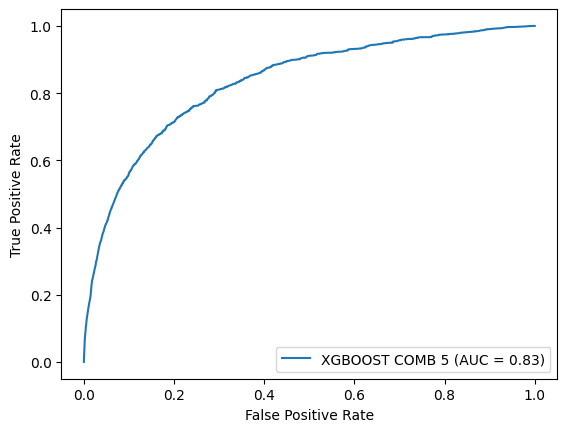

In [38]:
eval_comb5.plot_roc_curve(y_test, "XGBOOST COMB 5")

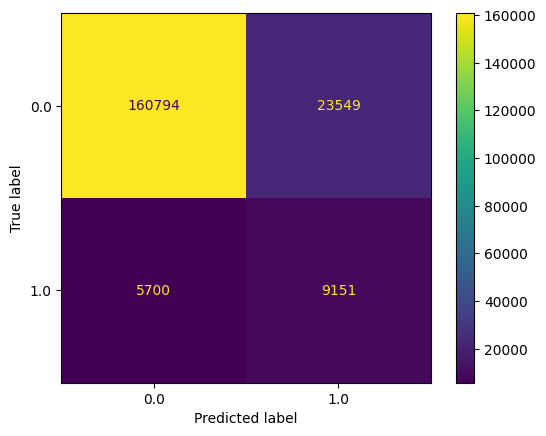

In [39]:
eval_comb5.plot_confusion_matrix(y_test)

## Comb 6

In [40]:
model_comb6 = XGBoostModel()
model_comb6.load_model(addresses[6])

In [41]:
X6_val, y6_val = generate_dataset_split(combinations[6][1])
best_threshold = model_comb6.find_best_threshold(X6_val, y6_val)

[I 2023-09-10 22:40:00,103] A new study created in memory with name: no-name-867371f2-1b3f-4bdc-b357-c7ab449d2225
[I 2023-09-10 22:40:00,425] Trial 0 finished with value: 0.1410632476759057 and parameters: {'threshold': 0.4092139633295199}. Best is trial 0 with value: 0.1410632476759057.
[I 2023-09-10 22:40:00,494] Trial 1 finished with value: 0.10406684819533127 and parameters: {'threshold': 0.20682761990356271}. Best is trial 0 with value: 0.1410632476759057.
[I 2023-09-10 22:40:00,574] Trial 2 finished with value: 0.6976569402439405 and parameters: {'threshold': 0.5753935286625474}. Best is trial 2 with value: 0.6976569402439405.
[I 2023-09-10 22:40:00,655] Trial 3 finished with value: 0.10406684819533127 and parameters: {'threshold': 0.01692580616095647}. Best is trial 2 with value: 0.6976569402439405.
[I 2023-09-10 22:40:00,774] Trial 4 finished with value: 0.10406684819533127 and parameters: {'threshold': 0.26828393407962353}. Best is trial 2 with value: 0.6976569402439405.
[I 20

In [42]:
print(best_threshold)

0.5791961989943983


In [43]:
X_test, y_test  = generate_dataset_split(['Porto Alegre'])

eval_comb6 = XGBoostEvaluator(model_comb6)
eval_comb6.evaluate(X_test, y_test)

Accuracy: 0.7995020146805853
F1 Score: 0.3115421371181822
ROC AUC Score: 0.7995020146805853
Recall: 0.29634368056023164
Precision: 0.32838382330995375


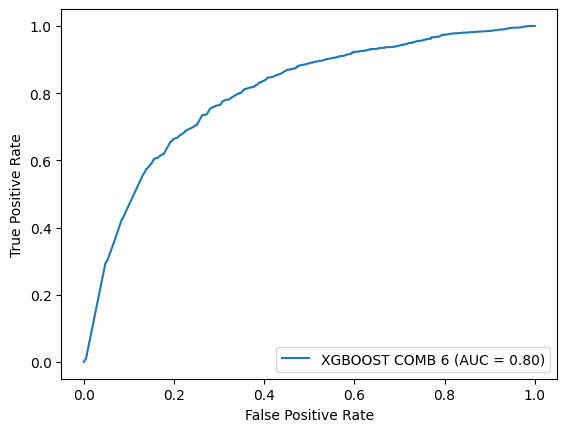

In [44]:
eval_comb6.plot_roc_curve(y_test, "XGBOOST COMB 6")

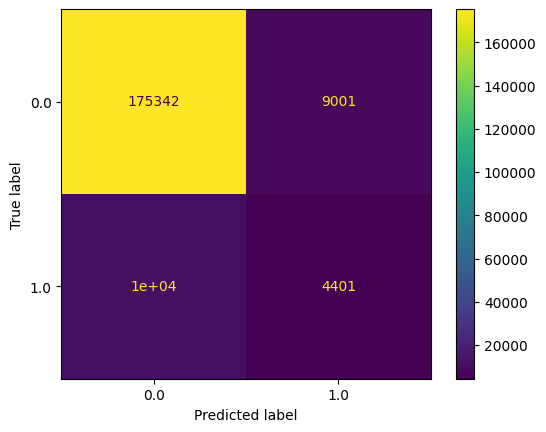

In [45]:
eval_comb6.plot_confusion_matrix(y_test)

## Comb 7

In [46]:
model_comb7 = XGBoostModel()
model_comb7.load_model(addresses[7])

In [47]:
X7_val, y7_val = generate_dataset_split(combinations[7][1])
best_threshold = model_comb7.find_best_threshold(X7_val, y7_val)

[I 2023-09-10 22:40:07,443] A new study created in memory with name: no-name-cb0de934-9e0c-452b-aeb0-c82cab8003dc
[I 2023-09-10 22:40:07,556] Trial 0 finished with value: 0.6678912587239352 and parameters: {'threshold': 0.7695521301703345}. Best is trial 0 with value: 0.6678912587239352.
[I 2023-09-10 22:40:07,587] Trial 1 finished with value: 0.6487570126496451 and parameters: {'threshold': 0.7258288854667515}. Best is trial 0 with value: 0.6678912587239352.
[I 2023-09-10 22:40:07,622] Trial 2 finished with value: 0.5232136362639297 and parameters: {'threshold': 0.6139573807155371}. Best is trial 0 with value: 0.6678912587239352.
[I 2023-09-10 22:40:07,669] Trial 3 finished with value: 0.16981940145482852 and parameters: {'threshold': 0.31861619312792605}. Best is trial 0 with value: 0.6678912587239352.
[I 2023-09-10 22:40:07,706] Trial 4 finished with value: 0.2579046945304876 and parameters: {'threshold': 0.45690628614953743}. Best is trial 0 with value: 0.6678912587239352.
[I 2023-

In [48]:
print(best_threshold)

0.7903454169056124


In [49]:
X_test, y_test  = generate_dataset_split(['Porto Alegre'])

eval_comb7 = XGBoostEvaluator(model_comb7)
eval_comb7.evaluate(X_test, y_test)

Accuracy: 0.8190892676722944
F1 Score: 0.28104476863688777
ROC AUC Score: 0.8190892676722944
Recall: 0.18874149888896372
Precision: 0.5500392464678179


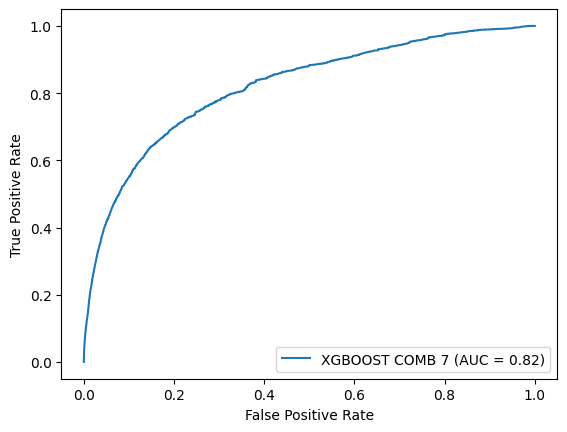

In [50]:
eval_comb7.plot_roc_curve(y_test, "XGBOOST COMB 7")

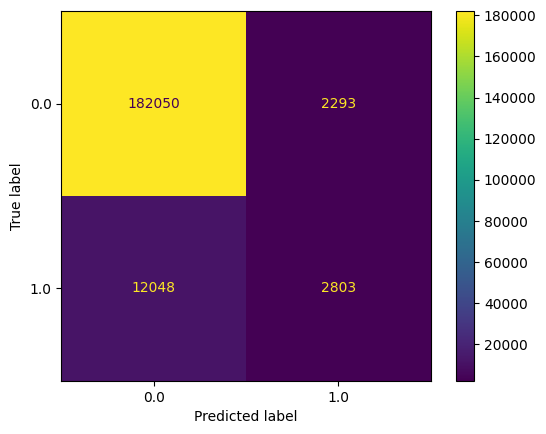

In [51]:
eval_comb7.plot_confusion_matrix(y_test)

## Comb 8

In [52]:
model_comb8 = XGBoostModel()
model_comb8.load_model(addresses[8])

In [53]:
X8_val, y8_val = generate_dataset_split(combinations[8][1])
best_threshold = model_comb8.find_best_threshold(X8_val, y8_val)

[I 2023-09-10 22:40:12,542] A new study created in memory with name: no-name-ace4736f-763a-4b78-bd3a-4fe84fbfd53a


[I 2023-09-10 22:40:13,046] Trial 0 finished with value: 0.7130479119148599 and parameters: {'threshold': 0.7493705572074297}. Best is trial 0 with value: 0.7130479119148599.
[I 2023-09-10 22:40:13,164] Trial 1 finished with value: 0.6176657028342721 and parameters: {'threshold': 0.6472934659488451}. Best is trial 0 with value: 0.7130479119148599.
[I 2023-09-10 22:40:13,275] Trial 2 finished with value: 0.44607063164401284 and parameters: {'threshold': 0.4723898614451087}. Best is trial 0 with value: 0.7130479119148599.
[I 2023-09-10 22:40:13,377] Trial 3 finished with value: 0.29562557035453163 and parameters: {'threshold': 0.28230550300742635}. Best is trial 0 with value: 0.7130479119148599.
[I 2023-09-10 22:40:13,473] Trial 4 finished with value: 0.297006118056789 and parameters: {'threshold': 0.2846848513731236}. Best is trial 0 with value: 0.7130479119148599.
[I 2023-09-10 22:40:13,578] Trial 5 finished with value: 0.34996902118098117 and parameters: {'threshold': 0.36313885440378

In [54]:
print(best_threshold)

0.7976744134021835


In [55]:
X_test, y_test  = generate_dataset_split(['Porto Alegre'])

eval_comb8 = XGBoostEvaluator(model_comb8)
eval_comb8.evaluate(X_test, y_test)

Accuracy: 0.8260132590039512
F1 Score: 0.38393313623935804
ROC AUC Score: 0.8260132590039512
Recall: 0.5815096626489799
Precision: 0.2865675603928856


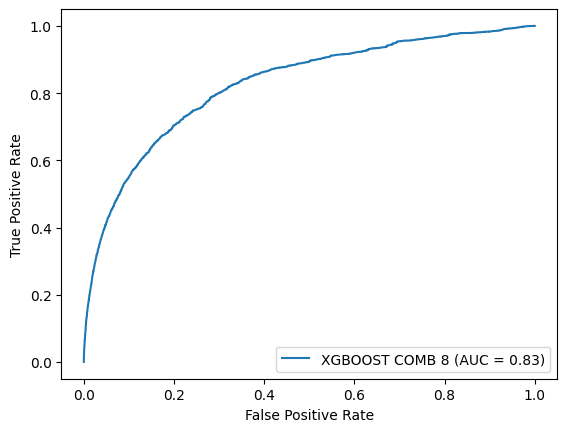

In [56]:
eval_comb8.plot_roc_curve(y_test, "XGBOOST COMB 8")

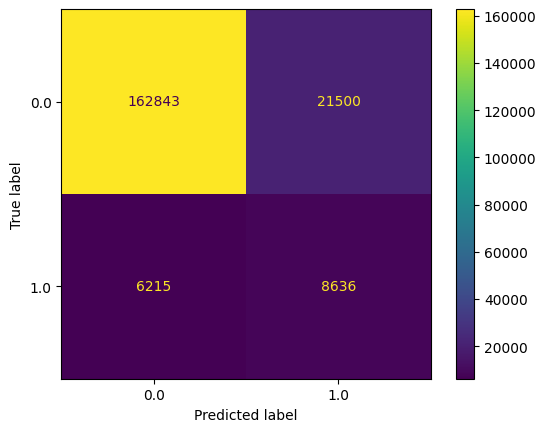

In [57]:
eval_comb8.plot_confusion_matrix(y_test)

## Comb 9

In [58]:
model_comb9 = XGBoostModel()
model_comb9.load_model(addresses[9])

In [59]:
X9_val, y9_val = generate_dataset_split(combinations[9][1])
best_threshold = model_comb9.find_best_threshold(X9_val, y9_val)

[I 2023-09-10 22:40:21,837] A new study created in memory with name: no-name-f1bb198b-6723-43cd-8593-319d1dc55118
[I 2023-09-10 22:40:22,292] Trial 0 finished with value: 0.486056765384896 and parameters: {'threshold': 0.2685522803290308}. Best is trial 0 with value: 0.486056765384896.
[I 2023-09-10 22:40:22,482] Trial 1 finished with value: 0.051995774746809706 and parameters: {'threshold': 0.049073006011822344}. Best is trial 0 with value: 0.486056765384896.
[I 2023-09-10 22:40:22,585] Trial 2 finished with value: 0.6613297169229535 and parameters: {'threshold': 0.4535184636970505}. Best is trial 2 with value: 0.6613297169229535.
[I 2023-09-10 22:40:22,700] Trial 3 finished with value: 0.6508105066943195 and parameters: {'threshold': 0.43618633705383236}. Best is trial 2 with value: 0.6613297169229535.
[I 2023-09-10 22:40:22,799] Trial 4 finished with value: 0.28662174525488976 and parameters: {'threshold': 0.15641373091272837}. Best is trial 2 with value: 0.6613297169229535.
[I 2023

In [60]:
print(best_threshold)

0.7997023073213492


In [61]:
X_test, y_test  = generate_dataset_split(['Porto Alegre'])

eval_comb9 = XGBoostEvaluator(model_comb9)
eval_comb9.evaluate(X_test, y_test)

Accuracy: 0.8341306414603831
F1 Score: 0.41628411800291804
ROC AUC Score: 0.8341306414603831
Recall: 0.39384553228738806
Precision: 0.44143396226415094


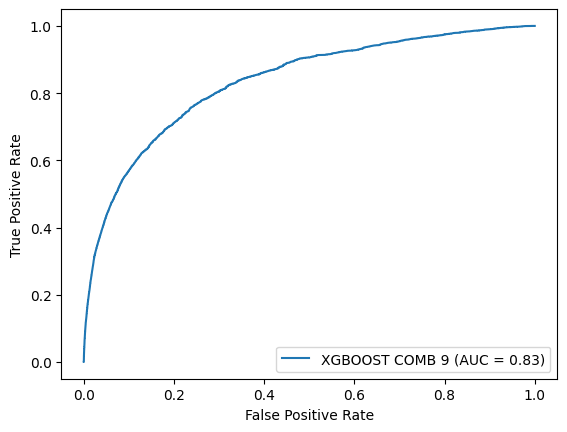

In [62]:
eval_comb9.plot_roc_curve(y_test, "XGBOOST COMB 9")

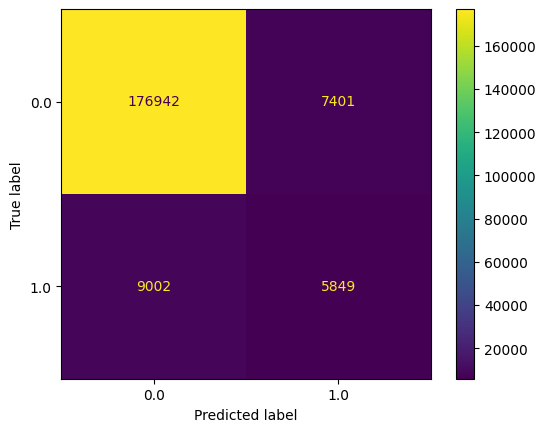

In [63]:
eval_comb9.plot_confusion_matrix(y_test)